In [1]:
%matplotlib inline

In [2]:
import os
from psfs import Basis, Hamiltonian
from psfs.constants import En_h, h, c, a0, e
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
from smtools import sm_sort

In [3]:
# lower states
mat0 = Hamiltonian(
           Basis(
               n_values=range(1, 5),
               S_values=[0],
               MJ_values=[0]))
print('Number of basis states:', '%d'%mat0.basis.num_states)

# upper states
mat1 = Hamiltonian(
           Basis(
               n_values=range(8, 15),
               S_values=[0],
               MJ_values=[0]))
print('Number of basis states:', '%d'%mat1.basis.num_states)

Number of basis states: 10
Number of basis states: 77


In [4]:
field = np.linspace(0, 5000, 300) 
# calculate Stark map
sm0 = sm_sort(mat0.stark_map(field * 100, units="J"))
sm1 = sm_sort(mat1.stark_map(field * 100, units="J"))

diagonalise matrix: 100%|██████████| 300/300 [00:00<00:00, 3415.05it/s]


In [5]:
%timeit mat1.stark_map(field * 100, tqdm_kw={"disable":True})

76.1 ms ± 4.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


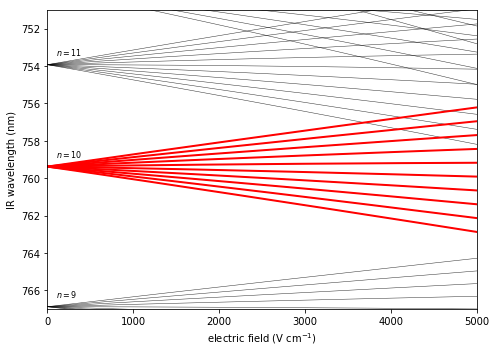

In [6]:
# Rydberg level
fig, ax = plt.subplots(figsize=(7, 5))

# plot
ix_2p = next(mat0.basis.argwhere(lambda x: x.n==2 and x.L==1))
for i in range(mat1.basis.num_states):
    ax.plot(field, 1e9 * c * h / (sm1[:, i] - sm0[:, ix_2p]), c='k', ls='-', lw=0.5, alpha=0.8)

for i in mat1.basis.argwhere(lambda x: x.n==10):
    ax.plot(field, 1e9 * c * h / (sm1[:, i] - sm0[:, ix_2p]), c='r', ls='-', lw=2, alpha=1)
    
# labels
# 2p state
lower = next(mat0.basis.where(lambda x: x.n==2 and x.L==1))
for n in [9, 10, 11]:
    # Rydberg state
    upper = next(mat1.basis.where(lambda x: x.n==n))
    en = (upper.energy(units="J") - lower.energy(units="J"))
    lbl_y = 1e9 * c * h / en
    ax.annotate(r'$n=%d$'%n, [100, lbl_y - 0.5], size=8)
    
# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('IR wavelength (nm)')

ax.set_ylim(767, 751)
ax.set_xlim(0, 5000)

# output
plt.tight_layout()
fileout = os.path.join("../images/n10.png")
plt.savefig(fileout, dpi=300)
plt.show()